# 1) Data Acquisition

In [1]:
!kaggle datasets download quora/question-pairs-dataset

Dataset URL: https://www.kaggle.com/datasets/quora/question-pairs-dataset
License(s): other
 91% 19.0M/20.8M [00:01<00:00, 22.2MB/s]
100% 20.8M/20.8M [00:01<00:00, 14.8MB/s]


In [2]:
!unzip question-pairs-dataset.zip

Archive:  question-pairs-dataset.zip
replace questions.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: questions.csv           


In [3]:
!rm -rf question-pairs-dataset.zip

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('questions.csv')

In [6]:
df = data.sample(30000, random_state = 2)

# 2) Data Inspection

In [7]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 339499 to 174228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


# 3) Data analysis

In [10]:
# Distribution of duplicate and non-duplicate questions
df.is_duplicate.value_counts()

,count
is_duplicate,
0,18918
1,11082


In [11]:
(df.is_duplicate.value_counts()/df.shape[0]*100).rename('Percentage', axis = 'index', inplace = True)

,Percentage
is_duplicate,
0,63.06
1,36.94


<ipython-input-12-587a071219bd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'is_duplicate', data = df, palette = 'pastel')


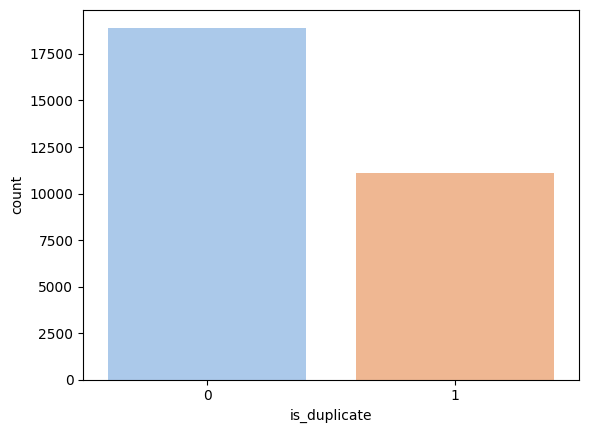

In [12]:
sns.countplot(x = 'is_duplicate', data = df, palette = 'pastel')
plt.savefig('countplot.png')
plt.show()

In [13]:
# unique and repeated questions

all_ques = df.question1.to_list() + df.question2.to_list()
unq_q = np.unique(all_ques).shape[0]
print(f'Unique questions: {unq_q}')

all_ques = pd.Series(all_ques)
rep_q = (all_ques.value_counts() > 1).sum()
print(f'Repeated questions: {rep_q}')

Unique questions: 55508
Repeated questions: 3396


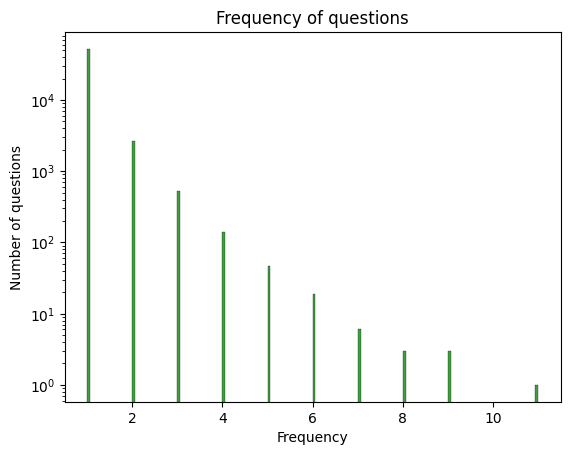

In [14]:
# Frequency of these questions

sns.histplot(all_ques.value_counts(), kde = False, bins = 160, color = 'g')
plt.yscale('log')
plt.title('Frequency of questions')
plt.xlabel('Frequency')
plt.ylabel('Number of questions')

plt.savefig('frequency_plot.png')

# 4) Feature Engineering

## 1) Question length

In [15]:
df['q1_len'] = df.question1.str.len()
df['q2_len'] = df.question2.str.len()

In [16]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39


## 2) Number of words in each question

In [17]:
df['q1_num_words'] = df.question1.apply(lambda x: len(x.split()))
df['q2_num_words'] = df.question2.apply(lambda x: len(x.split()))

In [18]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8


## 3) Number of common words

In [19]:
list(map(lambda word: word.lower().strip(), "Which is the best hatch back under RS 6 lakh?".split()))
# Gives you all the words in a question as a list, now we can store in a set to remove all repeating words

['which', 'is', 'the', 'best', 'hatch', 'back', 'under', 'rs', '6', 'lakh?']

In [20]:
set(map(lambda word: word.lower().strip(), "Which is the best hatch back under RS 6 lakh?".split()))

{'6', 'back', 'best', 'hatch', 'is', 'lakh?', 'rs', 'the', 'under', 'which'}

In [21]:
# So, we can pass the whole row with q1 and q2, then first get set for both questions then apply intersection

In [22]:
def common_words(row):
    q1_words = set(map(lambda word: word.lower().strip(), row.question1.split()))
    q2_words = set(map(lambda word: word.lower().strip(), row.question2.split()))
    return (len(q1_words) & len(q2_words))

In [23]:
df['words_common'] = df.apply(common_words, axis = 1)

In [24]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,8
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,1
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,21
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,8
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,8


## 4) words total

In [25]:
# Similar to the above function, but we add the len of words, not intersection

def total_words(row):
    q1_words = set(map(lambda word: word.lower().strip(), row.question1.split()))
    q2_words = set(map(lambda word: word.lower().strip(), row.question2.split()))
    return (len(q1_words) + len(q2_words))

In [26]:
df['words_total'] = df.apply(total_words, axis = 1)

In [27]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,words_total
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,8,19
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,1,32
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,21,42
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,8,18
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,8,19


## 5) words share

In [28]:
df['word_share'] = round(df.words_common/df.words_total, 2)

In [29]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,words_total,word_share
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,8,19,0.42
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,1,32,0.03
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,21,42,0.50
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,8,18,0.44
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,8,19,0.42


In [30]:
df.shape

(30000, 13)

# 5) EDA

In [31]:
print(f"Minimum length of question 1: {df.q1_len.min()}")
print(f"Maximum length of question 1: {df.q1_len.max()}")
print(f"Average number of characters: {np.round(df.q1_len.mean())}")

Minimum length of question 1: 2
Maximum length of question 1: 332
Average number of characters: 60.0


In [32]:
print(f"Minimum length of question 2: {df.q2_len.min()}")
print(f"Maximum length of question 2: {df.q2_len.max()}")
print(f"Average number of characters: {np.round(df.q2_len.mean())}")

Minimum length of question 2: 3
Maximum length of question 2: 1151
Average number of characters: 60.0


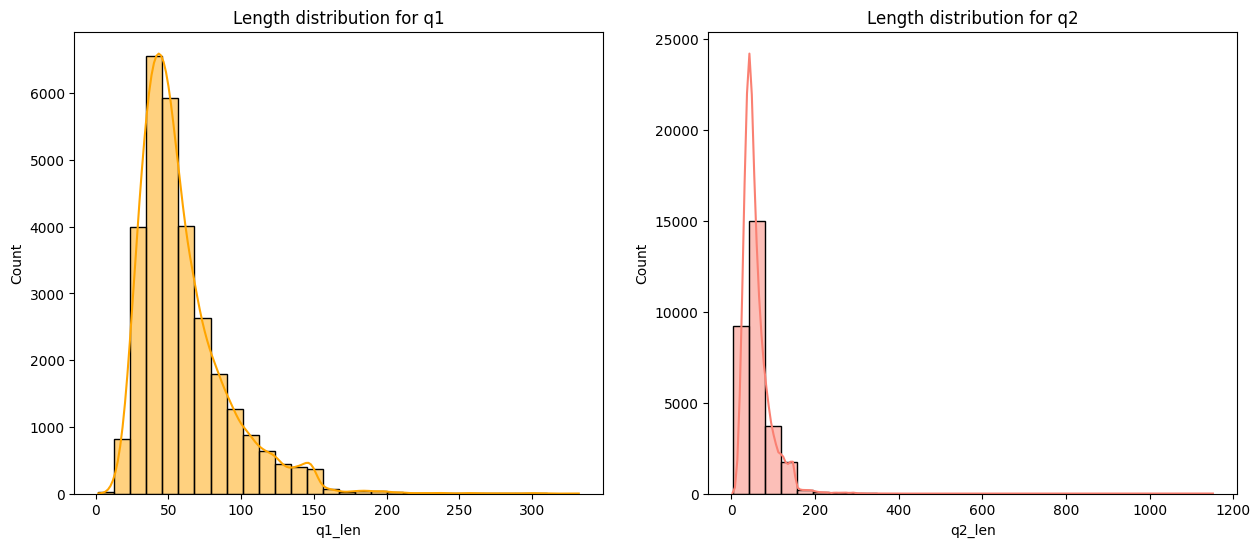

In [33]:
plt.subplots(1, 2, figsize = (15,6))

plt.subplot(1, 2, 1)
sns.histplot(df.q1_len, kde = True, bins = 30, color = 'orange')
plt.title('Length distribution for q1')

plt.subplot(1, 2, 2)
sns.histplot(df.q2_len, kde = True, bins = 30, color = 'salmon')
plt.title('Length distribution for q2')

plt.savefig('Question Length distribution.png')

In [34]:
print(f"Minimum words of question 1: {df.q1_num_words.min()}")
print(f"Maximum words of question 1: {df.q1_num_words.max()}")
print(f"Average number of words: {np.round(df.q1_num_words.mean())}")

Minimum words of question 1: 1
Maximum words of question 1: 62
Average number of words: 11.0


In [35]:
print(f"Minimum words of question 2: {df.q2_num_words.min()}")
print(f"Maximum words of question 2: {df.q2_num_words.max()}")
print(f"Average number of words: {np.round(df.q2_num_words.mean())}")

Minimum words of question 2: 1
Maximum words of question 2: 237
Average number of words: 11.0


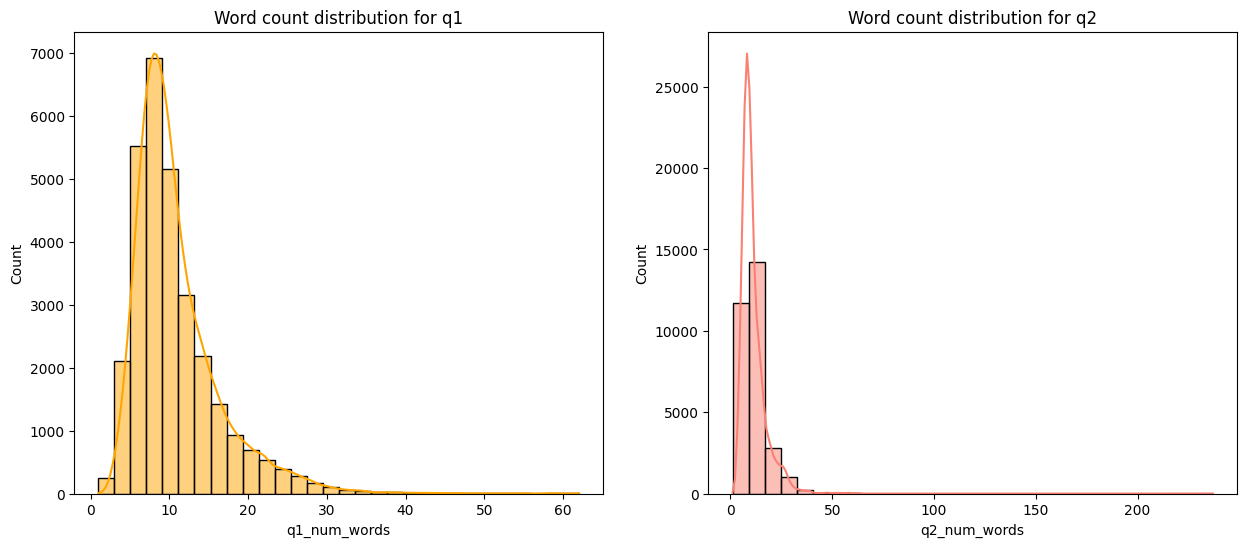

In [36]:
plt.subplots(1, 2, figsize = (15,6))

plt.subplot(1, 2, 1)
sns.histplot(df.q1_num_words, kde = True, bins = 30, color = 'orange')
plt.title('Word count distribution for q1')

plt.subplot(1, 2, 2)
sns.histplot(df.q2_num_words, kde = True, bins = 30, color = 'salmon')
plt.title('Word count distribution for q2')

plt.savefig('Word count distribution.png')

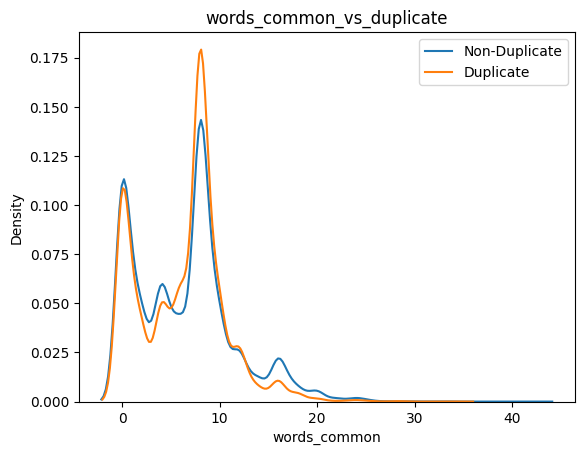

In [37]:
sns.kdeplot(df[df['is_duplicate'] == 0]['words_common'], label = 'Non-Duplicate')
sns.kdeplot(df[df['is_duplicate'] == 1]['words_common'], label = 'Duplicate')
plt.legend()
plt.title('words_common_vs_duplicate')
plt.savefig('words_common_vs_duplicate.png')

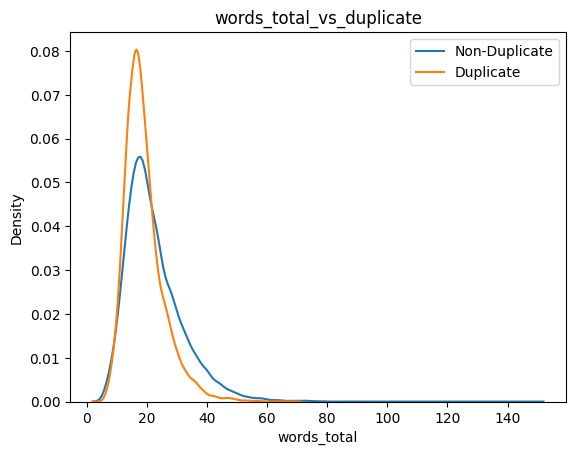

In [38]:
sns.kdeplot(df[df['is_duplicate'] == 0]['words_total'], label = 'Non-Duplicate')
sns.kdeplot(df[df['is_duplicate'] == 1]['words_total'], label = 'Duplicate')
plt.legend()
plt.title('words_total_vs_duplicate')
plt.savefig('words_total_vs_duplicate.png')

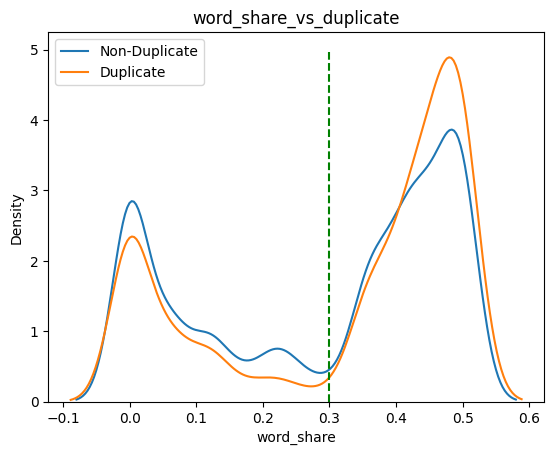

In [39]:
sns.kdeplot(df[df['is_duplicate'] == 0]['word_share'], label = 'Non-Duplicate')
sns.kdeplot(df[df['is_duplicate'] == 1]['word_share'], label = 'Duplicate')
plt.legend()
plt.title('word_share_vs_duplicate')
plt.vlines(x = 0.3, ymin = 0, ymax = 5, color = 'green', linestyle = '--', label = '0.3')
plt.savefig('word_share_vs_duplicate.png')

# 6) Feature Engineering

In [40]:
ques_df = df[['question1', 'question2']]
ques_df.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [41]:
final_df = df.drop(columns = ['id', 'qid1', 'qid2', 'question1', 'question2'])

In [42]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,words_total,word_share
339499,1,58,42,11,8,8,19,0.42
289521,0,52,105,11,22,1,32,0.03
4665,0,125,124,24,24,21,42,0.50
54203,1,45,60,8,10,8,18,0.44
132566,0,54,39,11,8,8,19,0.42


In [43]:
final_df.shape

(30000, 8)

## Bag of words

In [44]:
questions = list(ques_df['question1']) + list(ques_df['question2'])

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)

In [46]:
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [47]:
q1_df = pd.DataFrame(q1_arr, index = ques_df.index)
q2_df = pd.DataFrame(q2_arr, index = ques_df.index)

q_df = pd.concat([q1_df, q2_df], axis = 1)

In [48]:
q_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
final_df = pd.concat([final_df, q_df], axis = 1)

In [50]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,words_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,11,8,8,19,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,11,22,1,32,0.03,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,21,42,0.50,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,8,10,8,18,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,11,8,8,19,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0


# 7) Model

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(final_df.iloc[:, 1:], final_df.iloc[:, 0], test_size = 0.2, random_state = 42)

In [53]:
x_train.shape

(24000, 6007)

In [54]:
x_test.shape

(6000, 6007)

In [55]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
y_pred = rf.predict(x_test)

In [60]:
acc = accuracy_score(y_test, y_pred)

In [61]:
acc

0.7366666666666667

## XG Boost

In [62]:
from xgboost import XGBClassifier

In [63]:
xgb = XGBClassifier()

In [64]:
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.to_numpy()

In [65]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
if isinstance(x_test, pd.DataFrame):
    x_test = x_test.to_numpy()

In [67]:
y_pred2 = xgb.predict(x_test)

In [68]:
acc2 = accuracy_score(y_test, y_pred2)

In [69]:
acc2

0.7238333333333333

In [70]:
!zip -r results.zip *.png

  adding: countplot.png (deflated 24%)
  adding: frequency_plot.png (deflated 18%)
  adding: Question Length distribution.png (deflated 13%)
  adding: Word count distribution.png (deflated 14%)
  adding: words_common_vs_duplicate.png (deflated 7%)
  adding: word_share_vs_duplicate.png (deflated 4%)
  adding: words_total_vs_duplicate.png (deflated 9%)
